In [1]:
conda install -c conda-forge pytrends

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [14]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US')

kw_list = ["Ixom", "Orica Chemicals", "Coogee Chemicals", "Cleveland Bay"]
pytrends.build_payload(kw_list, cat=12, timeframe='2009-01-01 2015-01-01', geo='AU', gprop='')
data_before_2015 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU', gprop='')
data_after_2015 = pytrends.interest_over_time()

In [15]:
mean_before = round(data_before_2015.mean(), 2)
mean_after = round(data_after_2015.mean(), 2)
for kw in kw_list:
    print(kw + ":" + str(mean_before[kw]))

Ixom:0.0
Orica Chemicals:20.75
Coogee Chemicals:20.04
Cleveland Bay:5.7


In [16]:
for kw in kw_list:
    print(kw + ":" + str(mean_after[kw]))

Ixom:38.72
Orica Chemicals:7.92
Coogee Chemicals:29.82
Cleveland Bay:15.22


In [17]:
data_after_2015.to_csv('trends data after 2015.csv')
data_after_2015

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2015-03-01,18,9,27,9,False
2015-04-01,66,56,19,9,False
2015-05-01,35,53,35,9,False
2015-06-01,46,0,37,9,False
2015-07-01,44,26,44,18,False
...,...,...,...,...,...
2021-11-01,40,8,40,8,False
2021-12-01,25,0,16,8,False
2022-01-01,30,7,38,15,False


In [18]:
data_before_2015.to_csv('trends data before 2015.csv')
data_before_2015

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2009-01-01,0,38,19,0,False
2009-02-01,0,37,37,0,False
2009-03-01,0,0,47,0,False
2009-04-01,0,0,17,0,False
2009-05-01,0,77,31,0,False
...,...,...,...,...,...
2014-09-01,0,15,40,5,False
2014-10-01,0,29,24,9,False
2014-11-01,0,50,25,10,False


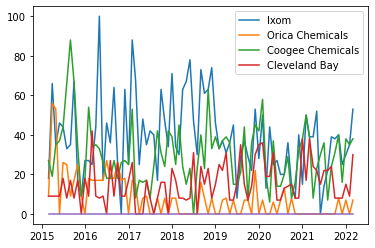

In [19]:
import matplotlib.pyplot as plt

plt.plot(data_after_2015)
plt.legend(kw_list)
plt.show()

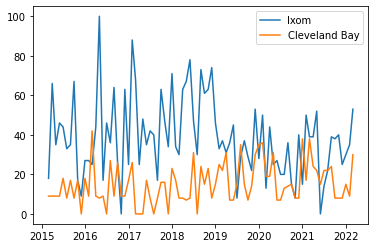

In [20]:
focus = ["Ixom", "Cleveland Bay"]
plt.plot(data_after_2015[focus])
plt.legend(focus)
plt.show()

In [21]:
region = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)
region

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay
geoName,,,,
Australian Capital Territory,0,0,0,0
New South Wales,65,12,18,5
Northern Territory,0,0,0,0
Queensland,15,0,28,57
South Australia,100,0,0,0
Tasmania,0,0,0,0
Victoria,72,14,12,2
Western Australia,15,0,85,0


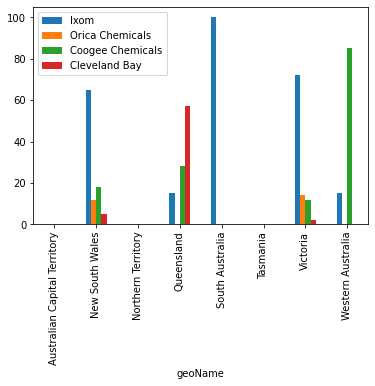

In [22]:
region.plot(kind = 'bar')
plt.show()

In [23]:
pytrends.related_queries() # related queries in last 7 years

{'Ixom': {'top':              query  value
  0            orica    100
  1   ixom chemicals     59
  2  orica chemicals     23
  3      ixom botany     22,
  'rising':              query    value
  0            orica  2088800
  1   ixom chemicals  1225450
  2  orica chemicals   484850
  3      ixom botany   461750},
 'Orica Chemicals': {'top':   query  value
  0  ixom    100,
  'rising':   query    value
  0  ixom  2386150},
 'Coogee Chemicals': {'top': None, 'rising': None},
 'Cleveland Bay': {'top':           query  value
  0  first choice    100,
  'rising':           query  value
  0  first choice    900}}

In [24]:
import pandas as pd
bigdata = pd.concat([data_before_2015, data_after_2015], sort=False)

In [25]:
bigdata

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2009-01-01,0,38,19,0,False
2009-02-01,0,37,37,0,False
2009-03-01,0,0,47,0,False
2009-04-01,0,0,17,0,False
2009-05-01,0,77,31,0,False
...,...,...,...,...,...
2021-11-01,40,8,40,8,False
2021-12-01,25,0,16,8,False
2022-01-01,30,7,38,15,False
